## Imports

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;

import Units


Reformatting test.txt as separate files. Not always needed, were designed this way for comparison to C++ output files.

Data imports

In [2]:
filepath = "../Data/Rust_Runs/Option2_Rust_Run2/";

data = np.loadtxt(filepath + "test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]

AList= np.unique(datanew[:, 2])
VList = np.unique(datanew[:,3])

#AList = np.loadtxt("./Data/2param_acc_Option2/Acceleration.txt");
#VList = np.loadtxt("./Data/2param_acc_Option2/LatticeDepth.txt");

AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);
MomProb = np.loadtxt(filepath +  "MomProb.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

/tmp/ipykernel_10900/1708206952.py:12: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);


In [3]:
print(AList[50], VList[25])
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
print(datamom[50,25,:])


0.0 10.0
[7.79475651e-04 1.07683464e-02 7.46451016e-03 4.35311148e-01
 1.19488382e-01 2.64746489e-02 5.98152566e-02 3.08016659e-01
 2.30293604e-04 3.02351607e-02 1.41611874e-03]


## Simulating Experimental Data

In [44]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));

P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
for i in range(len(AList)):
    P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
    #No errors

    Runs=50; # How many simulated data do we want
    outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
    unique, frequency = np.unique(outcomes, return_counts = True);
    his = np.bincount(outcomes,minlength=11)
    P_simulated[i] = his/np.sum(his)

There is a possibility of a bug here. I dont know what the start and end values for minlength are

In [45]:
def KLDivergence( P, Q):
    if len(P) != len(Q):
        return None;
    sum =0;

    for i in range(len(P)):
        sum = np.dot(P, np.log2( np.divide(P, Q)));

    return sum;

def JSDivergence( P, Q):
    M = (P+Q)/2;
    JS = 0.5 * ( KLDivergence(P,M) + KLDivergence(Q, M));
    return JS;


In [46]:
P_simulated[P_simulated==0.0]= 1.0*10**(-40);

Text(0.5, 1.0, 'Measurements=50000')

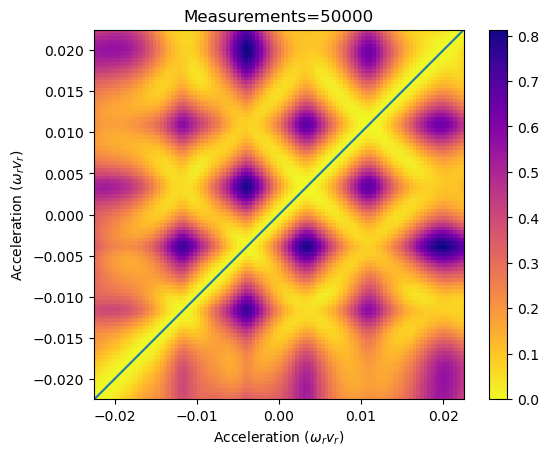

In [38]:

acc = AList

no_of_values = len(AList);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in range(no_of_values):
    for j in range(no_of_values):
        JSDivergenceMatrix [i][j]= JSDivergence(P_simulated[i], P_simulated[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]    *1.0, acc[-1]    *1.0, acc[-1]    *1.0, acc[0]     *1.0])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]    *1.0, AList[indices_JS[0]]    *1.0)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Acceleration ($\omega_r v_r$)")
plt.ylabel("Acceleration ($\omega_r v_r$)")
plt.title("Measurements="+str(Runs))
#plt.savefig("JS_acc.png")

Text(0.5, 1.0, 'Measurements=50')

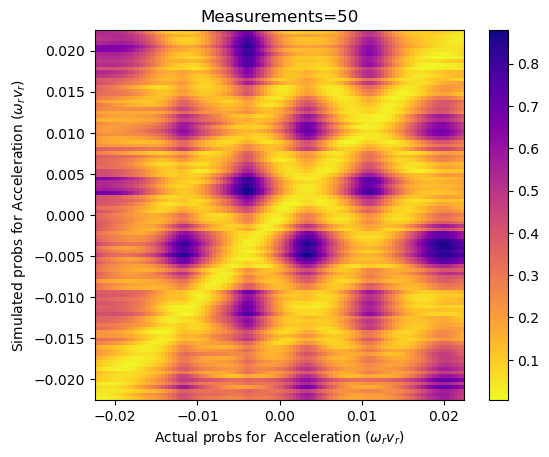

In [47]:

acc = AList

no_of_values = len(AList);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in range(no_of_values):
    for j in range(no_of_values):
        JSDivergenceMatrix [i][j]= JSDivergence(P_simulated[i], P_actual[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]    *1.0, acc[-1]    *1.0, acc[-1]    *1.0, acc[0]     *1.0])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]    *1.0, AList[indices_JS[0]]    *1.0)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Actual probs for  Acceleration ($\omega_r v_r$)")
plt.ylabel("Simulated probs for Acceleration ($\omega_r v_r$)")
plt.title("Measurements="+str(Runs))
#plt.savefig("JS_acc.png")

Text(0.5, 1.0, "KL_div(P_sim(a'),P_true(a=0.0)) vs no. of measurements")

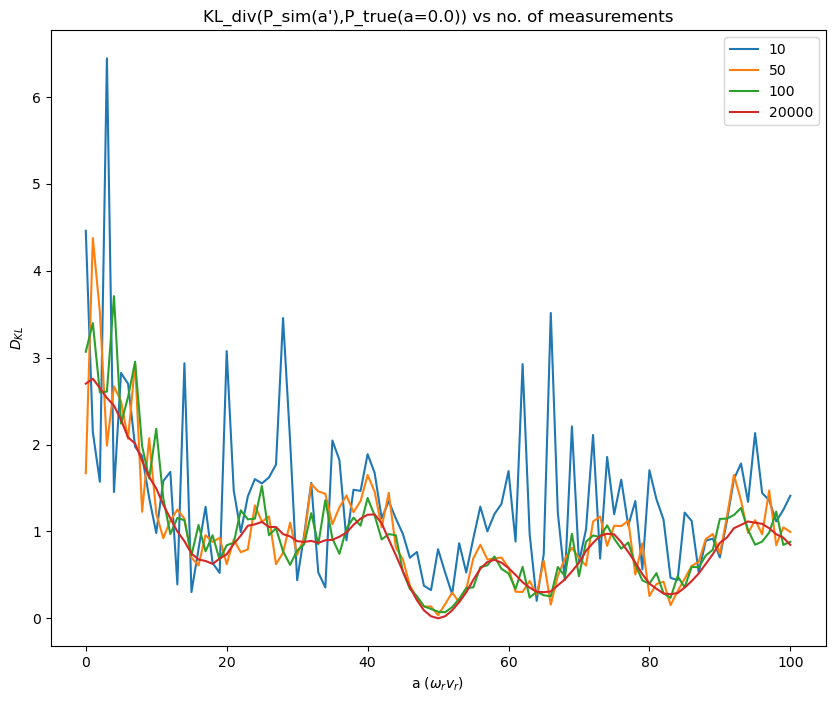

In [60]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));
fig= plt.figure(figsize=(10,8))
P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([ 10, 50, 100, 20000]);
JSDivergenceMatrix= np.zeros( (len(AList),1));
for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        P_simulated[i] = his/np.sum(his)
        P_simulated[P_simulated==0.0]= 1.0*10**(-40);
        JSDivergenceMatrix[i]=KLDivergence(P_simulated[i], P_actual[50])
    
    plt.plot(JSDivergenceMatrix, label=str(r))

plt.legend()
plt.ylabel("$D_{KL}$")
plt.xlabel("a $(\omega_r v_r)$")
plt.title("KL_div(P_sim(a'),P_true(a=0.0)) vs no. of measurements")

In [48]:
AList[50]

0.0